code is from here: https://heartbeat.fritz.ai/build-train-and-deploy-a-book-recommender-system-using-keras-tensorflow-js-b96944b936a7

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# import tensorflow_recommenders as tfrs

In [2]:
# ratings = pd.read_pickle("tiny_selection_longform.pkl")
ratings = pd.read_pickle("./Data/moderate_users_longform.pkl")
user_stats = pd.read_pickle("./Data/moderate_user_stats.pkl")

In [3]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

141676

In [4]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

72601

In [5]:
ratings.head()

,movie_id,rating_score,user_id,user,movie
5,1066,4,97262846,137735,1023
8,1066,4,58420503,83022,1023
11,1066,2,15492642,22070,1023
12,1066,4,29755671,42177,1023
15,1066,3,93302487,132199,1023


In [7]:

X = ratings[['movie', 'user']].values
y = ratings['rating_score'].values

X.shape, y.shape

((6864260, 2), (6864260,))

In [10]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.33, random_state=42)

In [12]:
X_train.shape, X_test.shape

((4599054, 3), (2265206, 3))

In [13]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [24]:
input_movies = keras.layers.Input(shape=[1])
embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
movies_out = keras.layers.Flatten()(embed_movies)

input_users = keras.layers.Input(shape=[1])
embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
users_out = keras.layers.Flatten()(embed_users)

conc_layer = keras.layers.Concatenate()([movies_out, users_out])
x = keras.layers.Dense(128, activation='relu')(conc_layer)
dropout = x = keras.layers.Dropout(rate=.2, seed=42)(x)
dense2 = x = keras.layers.Dense(50, activation='relu')(x)
x_out = x = keras.layers.Dense(1, activation='relu')(x)


model = keras.Model([input_movies, input_users], x_out)

In [25]:
opt = tf.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 15)        1089030     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        2125155     input_4[0][0]                    
____________________________________________________________________________________________

In [26]:
hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=1000, epochs=3, verbose=1, validation_split=.2)

Epoch 1/3
3680/3680 [==============================] - 92s 25ms/step - loss: 0.8070 - root_mean_squared_error: 0.8983 - val_loss: 0.7233 - val_root_mean_squared_error: 0.8505
Epoch 2/3
3680/3680 [==============================] - 93s 25ms/step - loss: 0.6971 - root_mean_squared_error: 0.8349 - val_loss: 0.7125 - val_root_mean_squared_error: 0.8441
Epoch 3/3
3680/3680 [==============================] - 92s 25ms/step - loss: 0.6637 - root_mean_squared_error: 0.8147 - val_loss: 0.7016 - val_root_mean_squared_error: 0.8376


In [29]:
import matplotlib.pyplot as plt

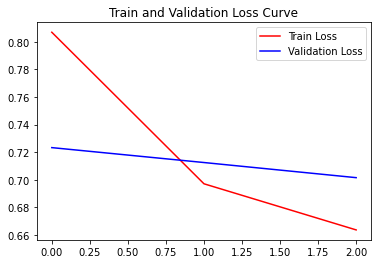

In [31]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [32]:
hist.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

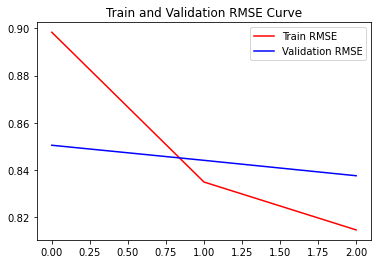

In [33]:
train_loss = hist.history['root_mean_squared_error']
val_loss = hist.history['val_root_mean_squared_error']
plt.plot(train_loss, color='r', label='Train RMSE')
plt.plot(val_loss, color='b', label='Validation RMSE')
plt.title("Train and Validation RMSE Curve")
plt.legend()
plt.show()

In [34]:
hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=128, epochs=5, verbose=1, validation_split=.2)

Epoch 1/5
28745/28745 [==============================] - 673s 23ms/step - loss: 0.6868 - root_mean_squared_error: 0.8288 - val_loss: 0.7097 - val_root_mean_squared_error: 0.8424
Epoch 2/5
28745/28745 [==============================] - 677s 24ms/step - loss: 0.6634 - root_mean_squared_error: 0.8145 - val_loss: 0.7429 - val_root_mean_squared_error: 0.8619
Epoch 3/5
28745/28745 [==============================] - 654s 23ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.7060 - val_root_mean_squared_error: 0.8402
Epoch 4/5
28745/28745 [==============================] - 647s 23ms/step - loss: 0.6324 - root_mean_squared_error: 0.7953 - val_loss: 0.7091 - val_root_mean_squared_error: 0.8421
Epoch 5/5
28745/28745 [==============================] - 638s 22ms/step - loss: 0.6204 - root_mean_squared_error: 0.7877 - val_loss: 0.7084 - val_root_mean_squared_error: 0.8416


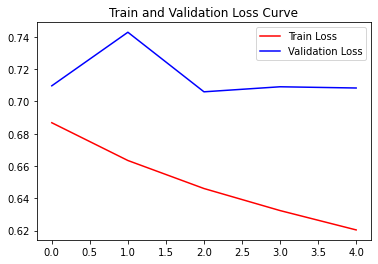

In [35]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

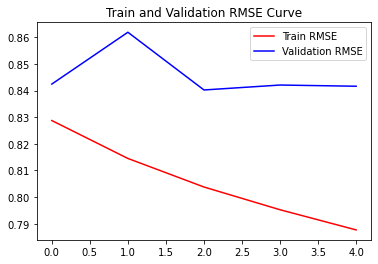

In [36]:
train_loss = hist.history['root_mean_squared_error']
val_loss = hist.history['val_root_mean_squared_error']
plt.plot(train_loss, color='r', label='Train RMSE')
plt.plot(val_loss, color='b', label='Validation RMSE')
plt.title("Train and Validation RMSE Curve")
plt.legend()
plt.show()

In [37]:
ratings[ratings.user_id==93302487]

,movie_id,rating_score,user_id,user,movie
15,1066,3,93302487,132199,1023
177284,1345,3,93302487,132199,1275
198923,1359,5,93302487,132199,1288
244847,1399,4,93302487,132199,1325
317119,1465,4,93302487,132199,1386
...,...,...,...,...,...
15127107,865,3,93302487,132199,829
15343609,963,3,93302487,132199,924
15399840,978,4,93302487,132199,939
15452593,995,5,93302487,132199,956


In [50]:
movie_array = ratings[ratings.user_id==93302487].movie.values.astype(int)
user = np.array([int(132199) for n in range(len(movie_array))])

In [51]:
movie_array.shape, movie_array.dtype, user.shape, user.dtype

((87,), dtype('int64'), (87,), dtype('int64'))

In [52]:
pred = model.predict([movie_array, user])

In [57]:
pred.flatten()

array([3.345584 , 3.581468 , 3.6281016, 3.5991843, 3.5802548, 3.8390293,
       3.3249876, 3.5991843, 3.587224 , 3.4404144, 3.5991843, 3.3779798,
       3.5991843, 3.4373567, 3.70543  , 3.6240776, 3.518842 , 3.3315716,
       3.5121791, 3.4015691, 3.4186172, 3.5279977, 3.8452895, 3.5991843,
       3.5991843, 3.5991843, 3.5991843, 3.691007 , 3.6693738, 3.5991843,
       3.5457745, 3.5991843, 3.9785814, 4.1352563, 3.5991843, 3.533689 ,
       3.747739 , 3.7834551, 3.8378985, 3.9177163, 3.9330394, 3.5945058,
       3.748171 , 3.852043 , 3.574605 , 3.8006196, 3.5991843, 3.550979 ,
       3.5891602, 3.5991843, 3.5991843, 3.935526 , 3.8597255, 3.8629131,
       3.5531027, 3.707834 , 3.9059062, 3.6820078, 3.7074194, 4.0968323,
       3.5846334, 3.5991843, 3.782853 , 3.5991843, 3.5733304, 3.3644624,
       3.8786235, 3.5991843, 3.930921 , 3.7444565, 3.5991843, 3.7254355,
       3.5991843, 3.8949907, 3.5280786, 4.259642 , 3.8174067, 3.9040446,
       3.5991843, 3.5991843, 3.5854185, 3.5991843, 

In [59]:
list(zip(zip(pred.flatten(), ratings[ratings.user_id==93302487].rating_score.values),movie_array))

[((3.345584, 3), 1023),
 ((3.581468, 3), 1275),
 ((3.6281016, 5), 1288),
 ((3.5991843, 4), 1325),
 ((3.5802548, 4), 1386),
 ((3.8390293, 3), 1427),
 ((3.3249876, 2), 1524),
 ((3.5991843, 3), 1586),
 ((3.587224, 4), 1599),
 ((3.4404144, 4), 1650),
 ((3.5991843, 2), 1655),
 ((3.3779798, 4), 2136),
 ((3.5991843, 4), 2389),
 ((3.4373567, 3), 3100),
 ((3.70543, 4), 3104),
 ((3.6240776, 3), 3106),
 ((3.518842, 4), 3123),
 ((3.3315716, 3), 4911),
 ((3.5121791, 3), 6271),
 ((3.4015691, 3), 7858),
 ((3.4186172, 4), 3),
 ((3.5279977, 4), 59),
 ((3.8452895, 4), 67),
 ((3.5991843, 4), 81),
 ((3.5991843, 4), 83),
 ((3.5991843, 4), 84),
 ((3.5991843, 5), 99),
 ((3.691007, 4), 108),
 ((3.6693738, 5), 113),
 ((3.5991843, 4), 114),
 ((3.5457745, 3), 131),
 ((3.5991843, 4), 133),
 ((3.9785814, 3), 137),
 ((4.1352563, 5), 139),
 ((3.5991843, 5), 145),
 ((3.533689, 2), 148),
 ((3.747739, 4), 149),
 ((3.7834551, 2), 150),
 ((3.8378985, 5), 153),
 ((3.9177163, 3), 155),
 ((3.9330394, 4), 156),
 ((3.5945058,